
Nitrogen Oxide percent change in United States from 1750 to 2019: 281145.23%
This positive percentage shows pollution levels have increased from 1750 to 2019

United States Pollution Summary:
Average total emissions: 85917547.53 tons
Maximum total emissions: 270900658.60 tons

United States - 85,917,547.53 kilotons
China - 82,154,607.14 kilotons
India - 29,653,698.65 kilotons


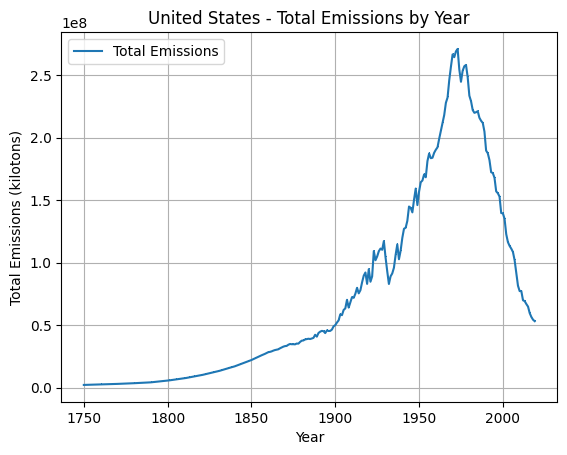

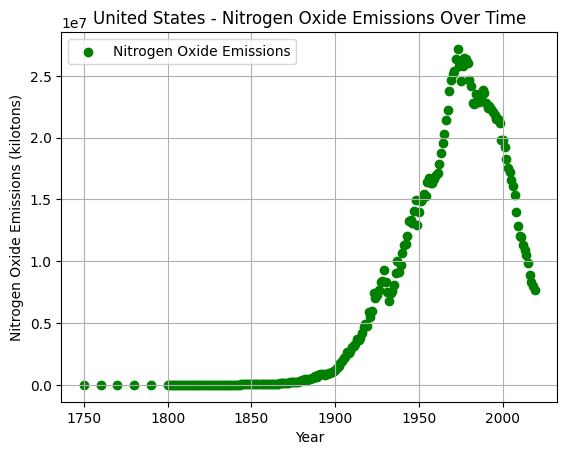

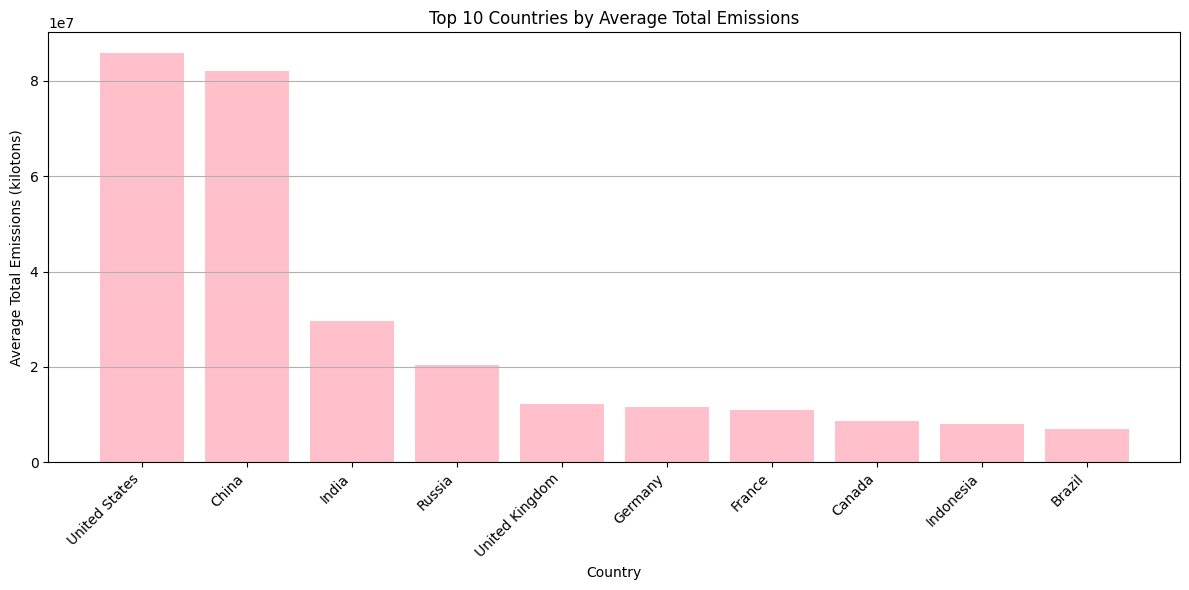

In [133]:
#######################################################################
# Program Filename: Air Pollution Emissions by Countries
# Author: Ava Donald
# Date: 8 June 2025
# Description: This program analyzes the emissions of various air pollutants (Nitrogen Oxide, Sulphur Dioxide, Carbon Monoxide, Organic Carbon, NMVOCs, Black Carbon, and Ammonia) through various countries throughout the time period 1750 to 2019.
# Input: The "air-pollution.csv" file containing all the country and year data needed.
# Output: The percent change in Nitrogen Oxide emissions (by the United States), the average emissions for the United States over the years, and the maximum total emissions.
#######################################################################

import pandas as pd
import matplotlib.pyplot as plt
import os
import pollution as pl
import importlib
importlib.reload(pl)


os.chdir("/content/drive/MyDrive/ENGR 103/hw")

filepath = "/content/air-pollution.csv"
df = pd.read_csv(filepath)

country = "United States"
pollutant = "Nitrogen Oxide"

# Gathers the years and Nitrogen Oxide emissions data for the United States
years, total_emissions, pollutant_emissions = pl.yearly_country_totals(df, country, pollutant)

# Calculates percent change for Nitrogen Oxide over time for the United States
change, start_year, end_year = pl.percent_change_first_last_year(df, country, pollutant)
print(f"\n{pollutant} percent change in {country} from {start_year} to {end_year}: {change:.2f}%")
if change > 0:
  print(f"This positive percentage shows pollution levels have increased from {start_year} to {end_year}")
elif change < 0:
  print(f"This negative percentage shows pollution levels have lowered from {start_year} to {end_year}")
else:
  print(f"This 0 percentage shows pollution levels have not changed from {start_year} to {end_year}")

# Gets the average and max total emissions for the United States
_, avg_total, max_total = pl.analyze_pollution_for_country(df, country)
print(f"\n{country} Pollution Summary:")
print(f"Average total emissions: {avg_total:.2f} tons")
print(f"Maximum total emissions: {max_total:.2f} tons")
print()

# Find the actual kiloton values for the top 3 countries (out of the top 10)
from pollution import get_top_polluters
top_countries, top_values = get_top_polluters(df, top_n=3)
for i in range(3):
    print(f"{top_countries[i]} - {top_values[i]:,.2f} kilotons")

# Gathers the top 10 polluting countries by their average emission values
top_countries, top_averages = pl.get_top_polluters(df, top_n=10)

# Line Plot: Total emissions by year produced by the United States
fig, ax1 = plt.subplots()
ax1.plot(years, total_emissions, marker=',', label='Total Emissions')
ax1.set_title(f"{country} - Total Emissions by Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Emissions (kilotons)")
ax1.grid()
ax1.legend()

# Scatter Plot: Nitrogen Oxide emissions by year produced by the United States
fig, ax2 = plt.subplots()
ax2.scatter(years, pollutant_emissions, color='green', label=f"{pollutant} Emissions")
ax2.set_title(f"{country} - {pollutant} Emissions Over Time")
ax2.set_xlabel("Year")
ax2.set_ylabel(f"{pollutant} Emissions (kilotons)")
ax2.grid()
ax2.legend()

# Bar Plot: Top 10 polluting countries by average emissions
fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.bar(top_countries, top_averages, color='pink')
ax3.set_title("Top 10 Countries by Average Total Emissions")
ax3.set_xlabel("Country")
ax3.set_ylabel("Average Total Emissions (kilotons)")
plt.xticks(rotation=45, ha='right')
ax3.grid(axis='y')
plt.tight_layout()

plt.show()
